In [1]:
# set environment and import packages
import os
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync')

In [2]:
CFS_file = 'RawData/CFS/CFS2017_national_export-only_20240607.csv'
CFS_export_df = read_csv(CFS_file)
print(CFS_export_df.columns)
CFS_export_df.head(5)

Index(['SHIPMT_ID', 'ORIG_STATE', 'ORIG_MA', 'ORIG_CFS_AREA', 'DEST_STATE',
       'DEST_MA', 'DEST_CFS_AREA', 'NAICS', 'QUARTER', 'SCTG', 'MODE',
       'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC', 'SHIPMT_DIST_ROUTED',
       'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT', 'WGT_FACTOR',
       'mode_agg5', 'mode_agg3', 'mode_decode', 'bulk', 'fuel_fert',
       'interm_food', 'mfr_goods', 'other', 'commodity', 'naics2',
       'naics_name', 'wholesale', 'mfring', 'mining', 'retail', 'info',
       'management', 'transwarehouse', 'wght_bin1', 'SHIPMT_WGHT_TON',
       'value_density', 'SHIPMT_DIST', 'mode_exports'],
      dtype='object')


,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,...,mining,retail,info,management,transwarehouse,wght_bin1,SHIPMT_WGHT_TON,value_density,SHIPMT_DIST,mode_exports
0,61,4,99999,04-99999,6,348,06-348,334,3,37,...,0,0,0,0,0,1,0.0005,212.000000,345,Parcel
1,65,9,408,09-408,36,408,36-408,334,3,38,...,0,0,0,0,0,1,0.0295,249.118644,55,Parcel
2,70,9,408,09-408,36,408,36-408,335,3,34,...,0,0,0,0,0,1,0.0025,150.600000,105,For-hire Truck
3,84,53,99999,53-99999,36,99999,36-99999,333,4,43,...,0,0,0,0,0,1,0.0005,603.000000,2384,Parcel
4,113,9,408,09-408,36,408,36-408,4238,3,34,...,0,0,0,0,0,2,0.6185,7.554568,96,Air


In [3]:
CFS_export_df[['SCTG', 'SHIPMT_WGHT', 'SHIPMT_WGHT_TON']].head(10)

,SCTG,SHIPMT_WGHT,SHIPMT_WGHT_TON
0,37,1,0.0005
1,38,59,0.0295
2,34,5,0.0025
3,43,1,0.0005
4,34,1237,0.6185
5,34,13,0.0065
6,35,2,0.0010
7,37,1,0.0005
8,34,1,0.0005
9,34,38485,19.2425


In [17]:
# cross tab of mode
export_mode_crosstab = pd.pivot_table(CFS_export_df,
                                     index = 'mode_exports',
                                     columns = 'mode_decode',
                                     values = 'WGT_FACTOR',
                                     aggfunc = 'count')

export_mode_crosstab

mode_decode,Air,Deep Sea,For-hire Truck,Great Lake,Other,Parcel,Private Truck,Rail and Water,Rail/IMX,Truck and Water
mode_exports,,,,,,,,,,
Air,48384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
For-hire Truck,NaN,NaN,53221.0,NaN,NaN,NaN,NaN,NaN,NaN,41369.0
Other,NaN,991.0,NaN,3.0,3118.0,NaN,NaN,NaN,NaN,NaN
Parcel,NaN,NaN,NaN,NaN,NaN,56298.0,NaN,NaN,NaN,NaN
Private Truck,NaN,NaN,NaN,NaN,NaN,NaN,2397.0,NaN,NaN,NaN
Rail/IMX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507.0,3114.0,NaN


In [3]:
print(CFS_export_df.EXPORT_CNTRY.unique())

['E' 'A' 'C' 'M' 'S']


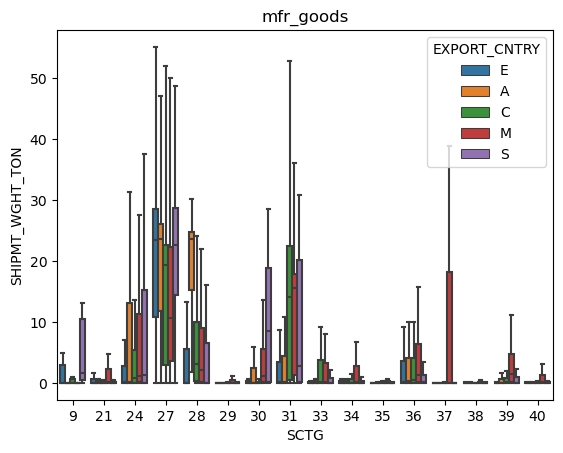

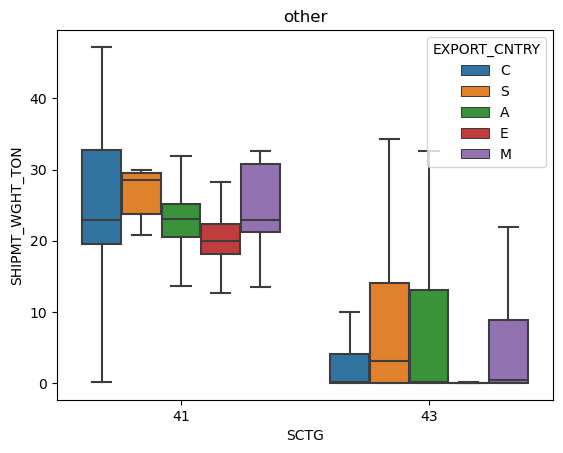

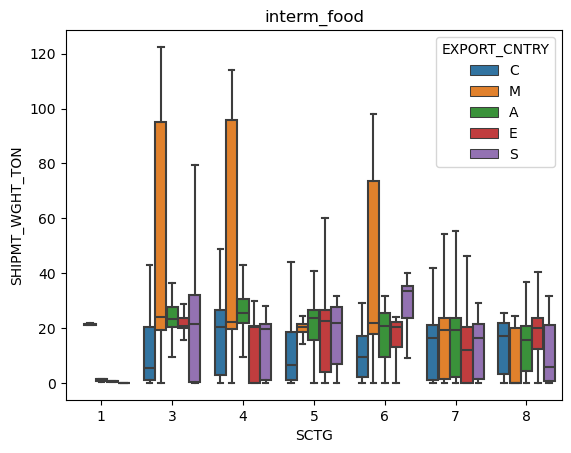

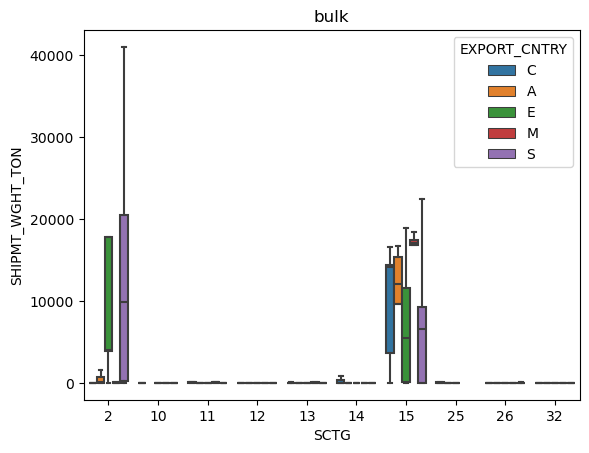

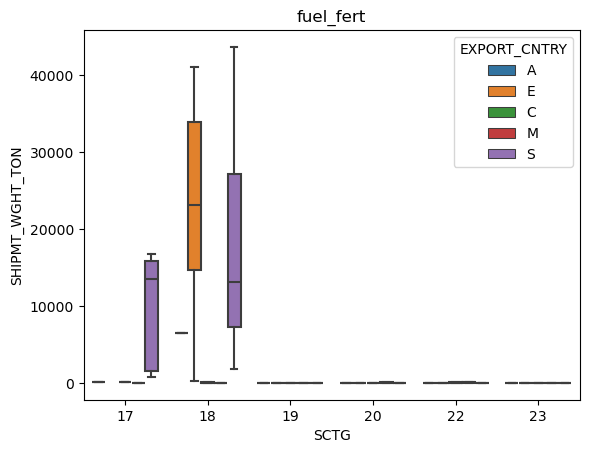

In [11]:
for sctg_group in CFS_export_df.commodity.unique():
    data_to_plot = CFS_export_df.loc[CFS_export_df['commodity'] == sctg_group]
    sns.boxplot(x="SCTG", y="SHIPMT_WGHT_TON", hue = 'EXPORT_CNTRY',
            data= data_to_plot,
            showfliers=False)
    plt.title(sctg_group)
    plt.show()

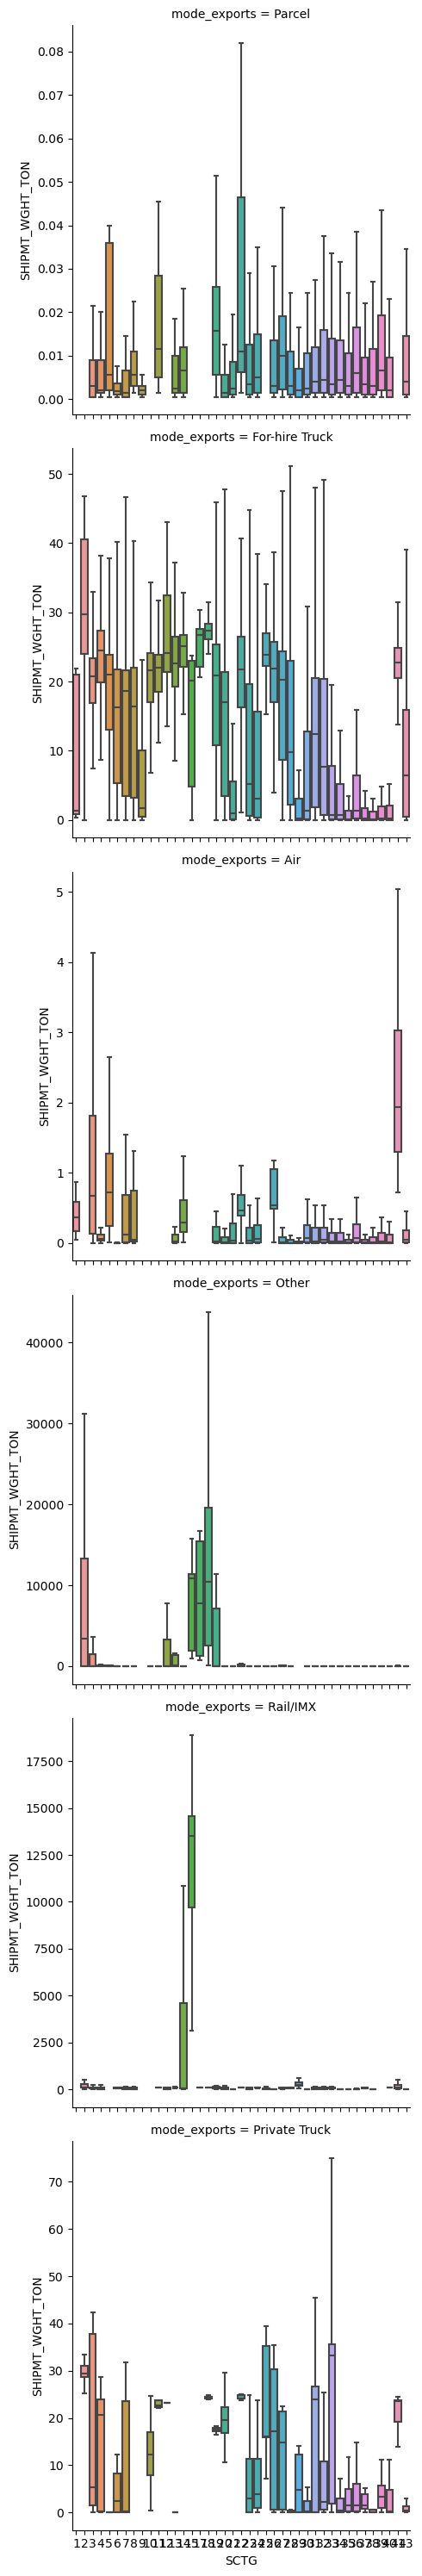

In [8]:
# for sctg_group in CFS_export_df.commodity.unique():
#     data_to_plot = CFS_export_df.loc[CFS_export_df['commodity'] == sctg_group]
sns.catplot(kind = 'box',
            x="SCTG", y="SHIPMT_WGHT_TON",
            row = 'mode_exports',
            data= CFS_export_df, sharey = False,
            showfliers=False)
# plt.title(sctg_group)
plt.show()

CFS export sample size:
211402


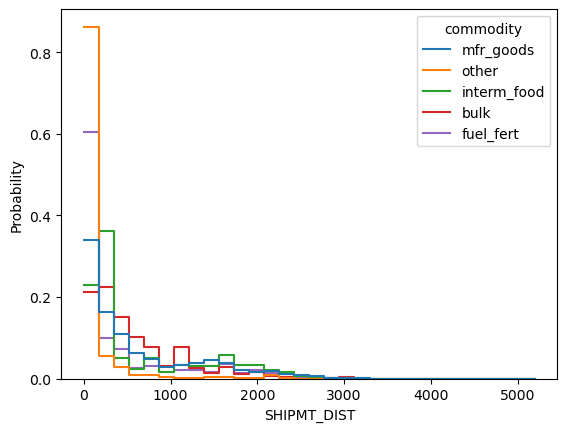

In [3]:
print('CFS export sample size:')
print(len(CFS_export_df))
CFS_export_df.loc[:, 'WGT_TONNES'] = CFS_export_df.loc[:, 'WGT_FACTOR'] * \
CFS_export_df.loc[:, 'SHIPMT_WGHT_TON']
sns.histplot(data = CFS_export_df, x = 'SHIPMT_DIST', bins = 30, 
             common_norm = False, hue = 'commodity', stat = 'probability',
             weights='WGT_TONNES', element = 'step', fill = False)
plt.show()

In [16]:
# cross tab of mode
export_mode_crosstab = pd.pivot_table(CFS_export_df,
                                     index = 'mode_exports',
                                     columns = 'mode_decode',
                                     values = 'WGT_TONNES',
                                     aggfunc = 'sum')

export_mode_crosstab

mode_decode,Air,Deep Sea,For-hire Truck,Great Lake,Other,Parcel,Private Truck,Rail and Water,Rail/IMX,Truck and Water
mode_exports,,,,,,,,,,
Air,2.583945e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
For-hire Truck,NaN,NaN,6.545444e+07,NaN,NaN,NaN,NaN,NaN,NaN,9.195590e+07
Other,NaN,9.931115e+07,NaN,462923.2695,2.959544e+07,NaN,NaN,NaN,NaN,NaN
Parcel,NaN,NaN,NaN,NaN,NaN,881382.3195,NaN,NaN,NaN,NaN
Private Truck,NaN,NaN,NaN,NaN,NaN,NaN,6.303345e+06,NaN,NaN,NaN
Rail/IMX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.047055e+08,7.180773e+07,NaN


In [9]:
# check mode for coal
CFS_export_coal = CFS_export_df.loc[CFS_export_df["SCTG"] == 15]
# CFS_export_coal.loc[:, 'WGT_TON'] = \
# CFS_export_coal.loc[:, 'WGT_FACTOR'] *CFS_export_coal.loc[:, 'SHIPMT_WGHT_TON']
print(CFS_export_coal.groupby(['mode_exports'])[["WGT_TONNES"]].sum())

CFS_export_coal.head(5)



                  WGT_TONNES
mode_exports                
For-hire Truck  1.093117e+05
Other           5.239594e+06
Rail/IMX        7.321002e+07


,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,...,retail,info,management,transwarehouse,wght_bin1,SHIPMT_WGHT_TON,value_density,SHIPMT_DIST,mode_exports,WGT_TONNES
157,4661,51,99999,51-99999,36,99999,36-99999,212,4,15,...,0,0,0,0,5,23.0710,0.189004,861,For-hire Truck,4.323505e+03
254,7628,51,99999,51-99999,36,99999,36-99999,212,2,15,...,0,0,0,0,5,23.0625,0.200000,861,For-hire Truck,4.314994e+03
1715,50056,54,99999,54-99999,24,12580,24-12580,212,2,15,...,0,0,0,0,3,2.6205,0.039496,537,For-hire Truck,3.249420e+01
1977,57017,54,99999,54-99999,24,12580,24-12580,212,1,15,...,0,0,0,0,3,1.5425,0.060940,537,For-hire Truck,1.928125e+01
3635,101700,54,99999,54-99999,51,545,51-545,212,3,15,...,0,0,0,0,5,7954.7090,0.055490,451,Rail/IMX,1.245707e+06


In [5]:
# mode by sctg
print('export mode split:')
print(CFS_export_df.groupby('mode_exports')['WGT_TONNES'].sum())
all_mode = CFS_export_df.mode_exports.unique()
sctg_by_mode = pd.pivot_table(CFS_export_df, index = 'SCTG',
                             columns = ['mode_exports'],
                             values = 'WGT_TONNES', aggfunc = 'sum')
sctg_by_mode.to_csv('SynthFirm_parameters/commodity_by_mode_international.csv',
                        index = True)
# sctg_by_mode = sctg_by_mode.fillna(0)
sctg_by_mode.loc[:, all_mode] = \
    sctg_by_mode.loc[:, all_mode].div(sctg_by_mode.loc[:, all_mode].sum(axis=1), axis=0)
sctg_by_mode.loc[:, 'Airport'] = 1
sctg_by_mode.loc[sctg_by_mode['Air'].isna(), 'Airport'] = 0

sctg_by_mode.loc[:, 'Port'] = 1

sctg_by_mode.loc[:, 'Crossing'] = 1
sctg_by_mode_out = sctg_by_mode[['Airport', 'Port', 'Crossing']]
sctg_by_mode_out = sctg_by_mode_out.reset_index()
sctg_by_mode_out.to_csv('SynthFirm_parameters/commodity_to_port_constraint.csv',
                        index = False)

export mode split:
mode_exports
Air               2.583945e+06
For-hire Truck    1.574103e+08
Other             1.293695e+08
Parcel            8.813823e+05
Private Truck     6.303345e+06
Rail/IMX          1.765132e+08
Name: WGT_TONNES, dtype: float64


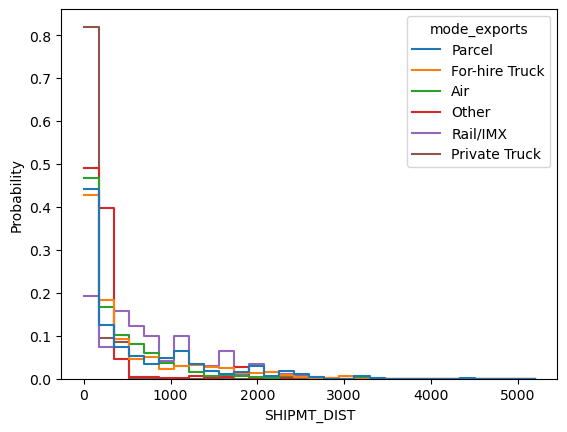

In [7]:
sns.histplot(data = CFS_export_df, x = 'SHIPMT_DIST', bins = 30, 
             common_norm = False, hue = 'mode_exports', stat = 'probability',
             weights='WGT_TONNES', element = 'step', fill = False)
plt.show()

<Axes: xlabel='WGT_TONNES', ylabel='SCTG_NAME'>

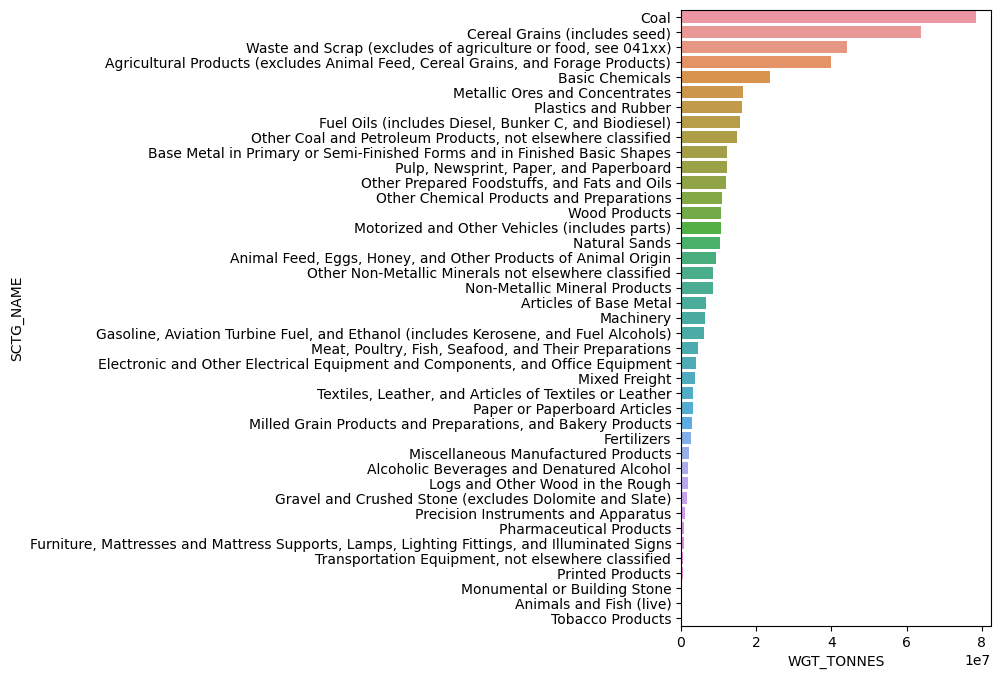

In [8]:
SCTG_lookup_file = 'SynthFirm_parameters/SCTG_Groups_revised.csv'
SCTG_lookup = read_csv(SCTG_lookup_file)
# SCTG_lookup.head(5)
SCTG_lookup = SCTG_lookup[['SCTG_Code', 'Description']]
SCTG_lookup.columns = ['SCTG', 'SCTG_NAME']

CFS_export_by_sctg = CFS_export_df.groupby(['SCTG'])[['WGT_TONNES']].sum()
CFS_export_by_sctg = CFS_export_by_sctg.reset_index()
CFS_export_by_sctg = pd.merge(CFS_export_by_sctg, SCTG_lookup, 
                              on = 'SCTG', how = 'left')
CFS_export_by_sctg = CFS_export_by_sctg.sort_values(by = 'WGT_TONNES',
                                                   ascending = False)
# weighted shipment by commodity
plt.figure(figsize = (4,8))
sns.barplot(x="WGT_TONNES", y="SCTG_NAME", data=CFS_export_by_sctg)

205
210


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),
  Text(38, 0, '39'),
  Text

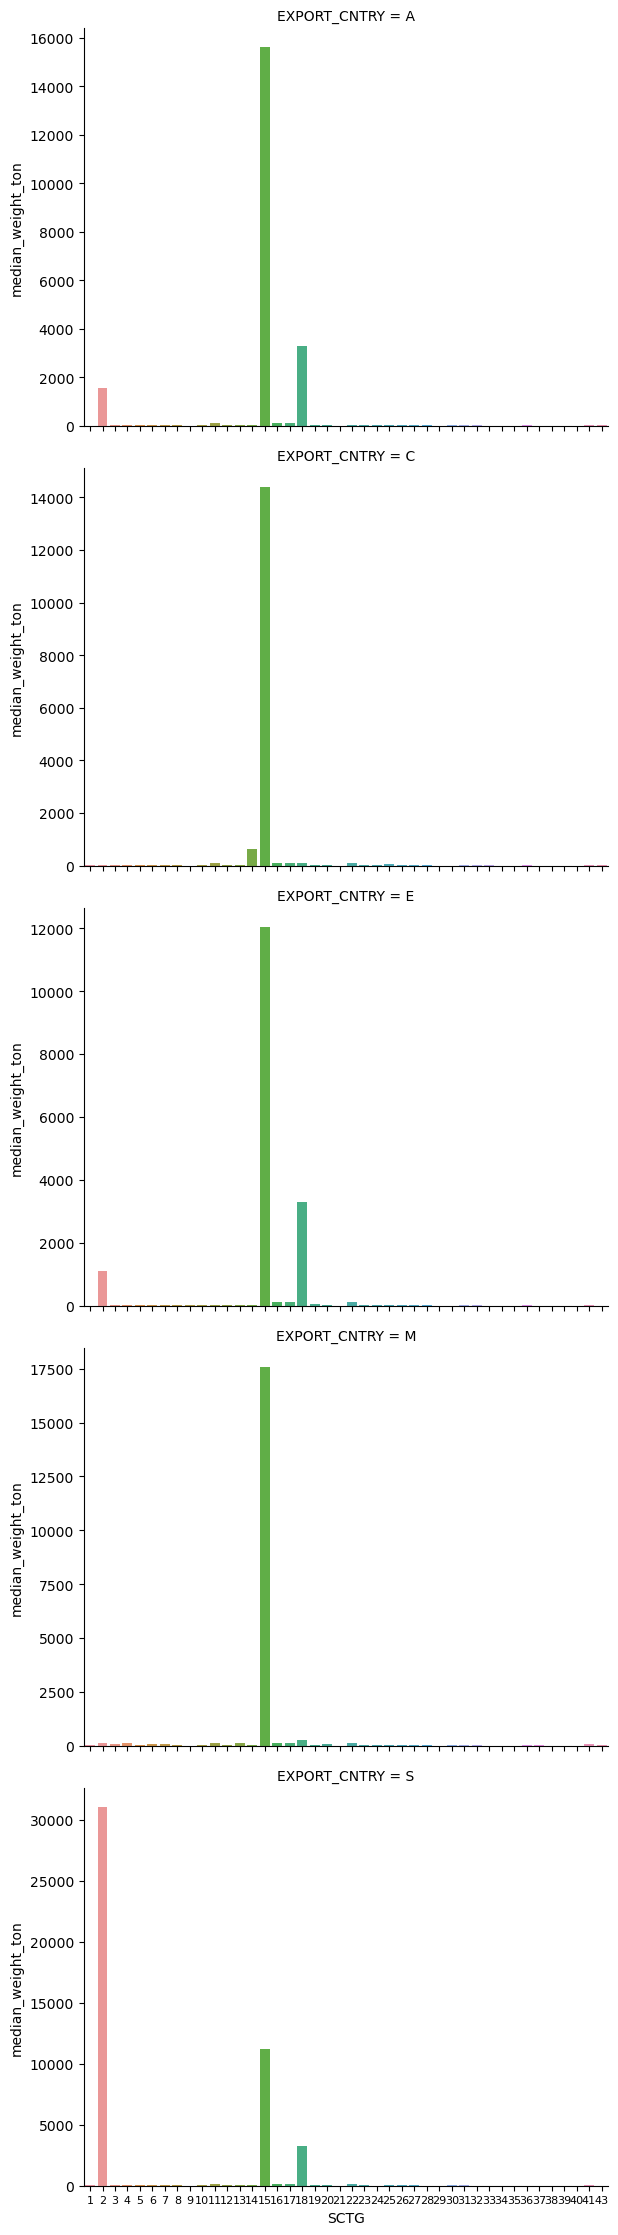

In [3]:
# generate shipment size by sctg, maybe also region
def quantile(x):
    return x.quantile(0.8)

def lowerci(x):
    return x.quantile(0.025)

def upperci(x):
    return x.quantile(0.975)
CFS_export_df["EXPORT_CNTRY"] = \
CFS_export_df["EXPORT_CNTRY"].astype("category")
shipment_size_by_sctg_cntry = \
CFS_export_df.groupby(['SCTG', 'EXPORT_CNTRY']).agg({'SHIPMT_WGHT_TON':['count', quantile, lowerci, upperci]})
print(len(shipment_size_by_sctg_cntry))
shipment_size_by_sctg_cntry.columns = ['sample size', 'median_weight_ton',
                                       'lower bound', 'upper bound']
shipment_size_by_sctg_cntry = \
shipment_size_by_sctg_cntry.reset_index()
# shipment_size_by_sctg_cntry.head(5)

shipment_size_by_sctg = \
CFS_export_df.groupby(['SCTG']).agg({'SHIPMT_WGHT_TON':['count', quantile, 
                                                        lowerci, upperci]})
shipment_size_by_sctg.columns = ['sample size', 'median_weight_ton', 
                                 'lower bound', 'upper bound']
shipment_size_by_sctg = shipment_size_by_sctg.reset_index()
# shipment_size_by_sctg.head(5)

low_sample_size = shipment_size_by_sctg_cntry['sample size'] <= 10
shipment_size_by_sctg_cntry.loc[low_sample_size, 'median_weight_ton'] = np.nan

shipment_size_by_sctg_to_fill = \
shipment_size_by_sctg_cntry.loc[low_sample_size]

shipment_size_by_sctg_no_fill = \
shipment_size_by_sctg_cntry.loc[~low_sample_size]

shipment_size_by_sctg_to_fill = \
shipment_size_by_sctg_to_fill.drop(columns = ['sample size', 
                                              'median_weight_ton',
                                              'upper bound', 'lower bound'])

shipment_size_by_sctg_to_fill = \
pd.merge(shipment_size_by_sctg_to_fill,
        shipment_size_by_sctg, on = 'SCTG', how = 'left')



shipment_size_by_sctg_to_fill.head(5)

shipment_size_by_sctg_cntry = \
pd.concat([shipment_size_by_sctg_to_fill, shipment_size_by_sctg_no_fill])

shipment_size_16_to_fill = \
shipment_size_by_sctg_cntry.loc[shipment_size_by_sctg_cntry['SCTG'] == 17]
shipment_size_16_to_fill.loc[:, 'SCTG'] = 16
shipment_size_by_sctg_cntry = \
pd.concat([shipment_size_by_sctg_cntry, shipment_size_16_to_fill])

print(len(shipment_size_by_sctg_cntry))
shipment_size_by_sctg_cntry.head(5)
sns.catplot(kind = 'bar', data = shipment_size_by_sctg_cntry,
            x = 'SCTG', y = 'median_weight_ton', 
            row = 'EXPORT_CNTRY', sharey = False,
           height = 4.5, aspect = 1.4)
plt.xticks(fontsize = 8)

In [4]:
shipment_size_by_sctg_cntry.drop(columns = 'sample size', inplace = True)
shipment_size_by_sctg_cntry.columns = ['SCTG', 'CFS_CODE', 'median_weight_ton', 'lower bound', 'upper bound']
shipment_size_by_sctg_cntry.to_csv('SynthFirm_parameters/international_shipment_size.csv',
                                  index = False)

In [6]:
shipment_size_by_sctg_cntry.head(10)

,SCTG,CFS_CODE,median_weight_ton,lower bound,upper bound
0,1,C,1.2705,0.057900,21.631900
1,1,S,1.2705,0.057900,21.631900
2,2,E,43.0570,16.515000,31858.960875
3,10,A,20.7730,0.127525,33.141850
4,10,M,20.7730,0.127525,33.141850
5,10,S,20.7730,0.127525,33.141850
6,11,A,97.8465,0.021300,121.774500
7,11,S,97.8465,0.021300,121.774500
8,12,A,24.0790,9.103000,1068.338100
9,12,E,24.0790,9.103000,1068.338100
